[[0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 0]
 ...
 [0 1 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


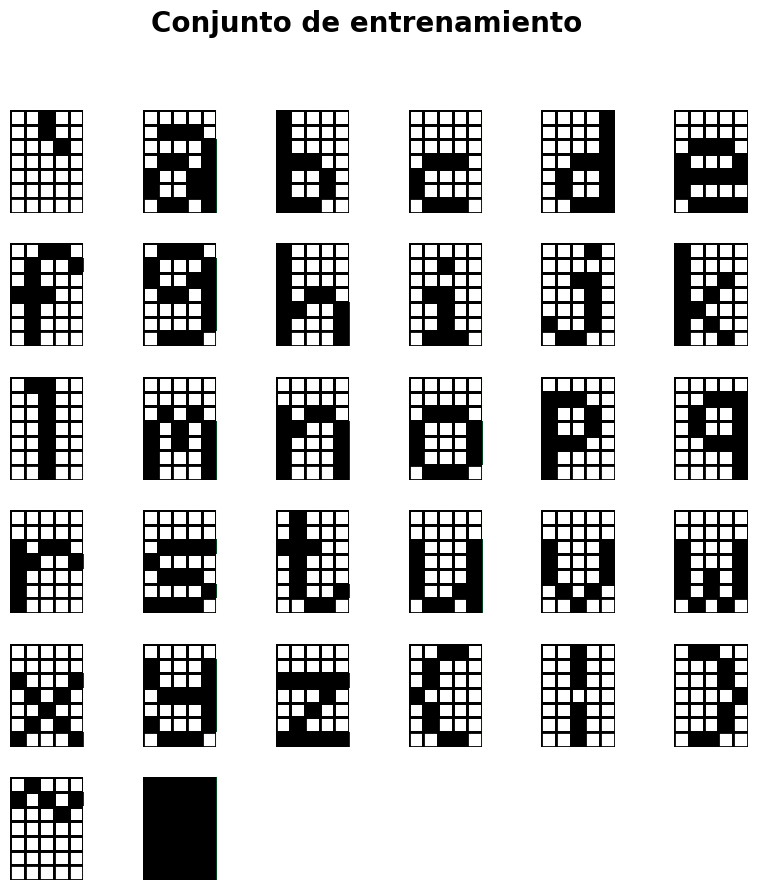

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 1.1880219183206566


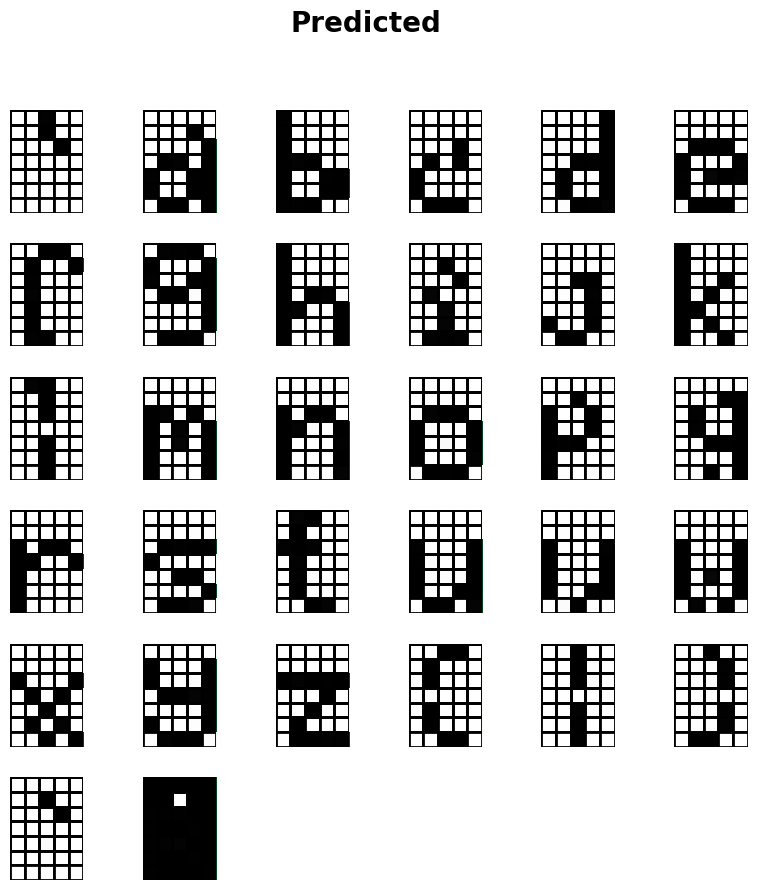

Latent space value:  [0.99787896 0.79866361]  for letter in index  0
Latent space value:  [0.11149456 0.22119644]  for letter in index  1
Latent space value:  [0.00117483 0.29451788]  for letter in index  2
Latent space value:  [0.64136085 0.64439916]  for letter in index  3
Latent space value:  [0.30852364 0.0057987 ]  for letter in index  4
Latent space value:  [0.38727719 0.46295803]  for letter in index  5
Latent space value:  [0.70586792 0.00074595]  for letter in index  6
Latent space value:  [0.03226986 0.04337692]  for letter in index  7
Latent space value:  [0.00132514 0.66864929]  for letter in index  8
Latent space value:  [0.80027871 0.85399382]  for letter in index  9
Latent space value:  [0.64715466 0.4234243 ]  for letter in index  10
Latent space value:  [0.06922585 0.99923813]  for letter in index  11
Latent space value:  [0.99833614 0.30488254]  for letter in index  12
Latent space value:  [0.09419708 0.74529338]  for letter in index  13
Latent space value:  [0.222348

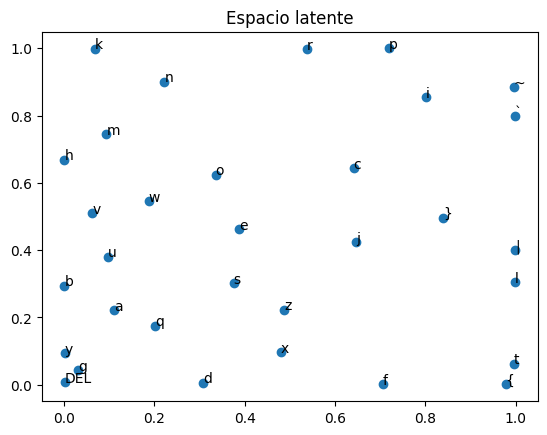

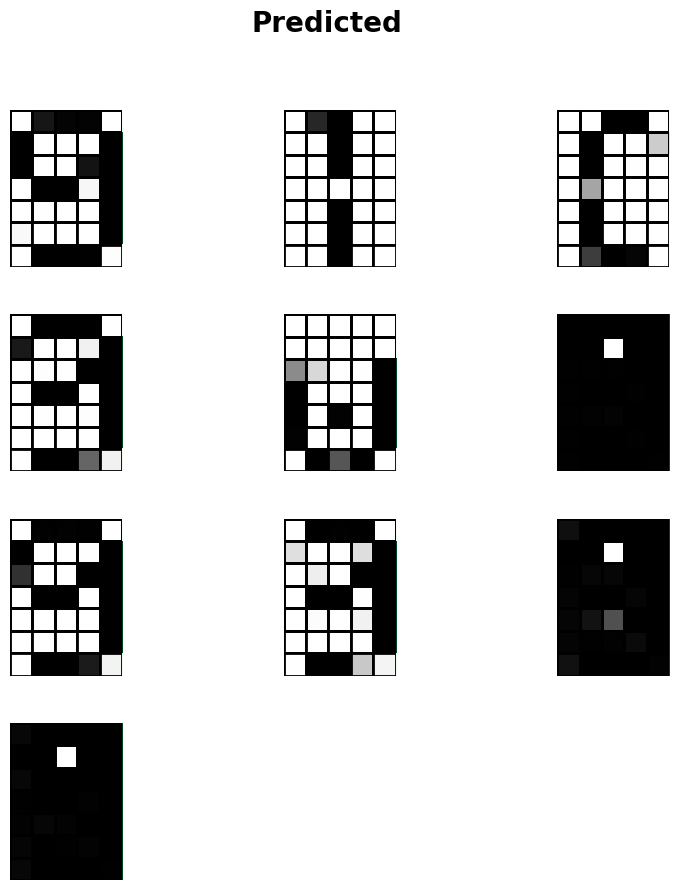

Latent space value:  [0.02637148 0.05756035]  for letter in index  0
Latent space value:  [0.99714473 0.35669729]  for letter in index  1
Latent space value:  [8.66805118e-01 8.07179032e-04]  for letter in index  2
Latent space value:  [0.07067928 0.00688978]  for letter in index  3
Latent space value:  [0.2211373  0.49848811]  for letter in index  4
Latent space value:  [0.00339074 0.00661245]  for letter in index  5
Latent space value:  [0.04744236 0.04796068]  for letter in index  6
Latent space value:  [0.12209947 0.00304769]  for letter in index  7
Latent space value:  [0.0095276  0.01988832]  for letter in index  8
Latent space value:  [0.00866416 0.00456429]  for letter in index  9


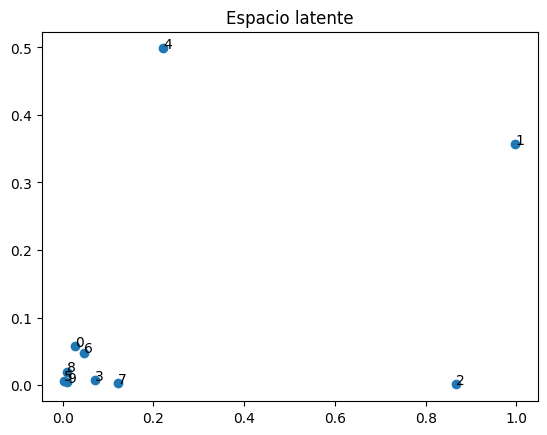

In [1]:
import json
from src.utils import DataConfig, extract_patterns
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_3, symbols3, _font_num, symbols_num


with open('./config_linear.json', 'r') as f:
        data_config = json.load(f)

c = DataConfig(data_config, _font_3)

print(c.input_data)

plot_letters(c.input_data, "Conjunto de entrenamiento")

autoencoder = Autoencoder(c.input_data, c.input_data, c.latent_space_size,
                              c.learning_rate, c.bias, c.epochs, c.training_percentage,
                              c.min_error, c.qty_hidden_layers, c.qty_nodes_in_hidden_layers, 
                              c.output_activation, c.hidden_activation, c.beta,
                              c.optimizer_method, c.alpha, c.beta1, c.beta2,
                              c.epsilon)
autoencoder.train()

predicted = []
for x in c.input_data:
        p = autoencoder.predict(x)
        predicted.append(p)
plot_letters(predicted, "Predicted")
    
list = []
for i in range(len(c.input_data)):
        value = autoencoder.latent_space(c.input_data[i])
        list.append(value)
        print("Latent space value: ", value, " for letter in index ", i)
plot_latent_space(np.array(list), symbols3)

predicted_num = []
numbers = extract_patterns(_font_num)
for x in numbers:
        p = autoencoder.predict(x)
        predicted_num.append(p)
plot_letters(predicted_num, "Predicted")
    
list = []
for i in range(len(numbers)):
        value = autoencoder.latent_space(numbers[i])
        list.append(value)
        print("Latent space value: ", value, " for letter in index ", i)
plot_latent_space(np.array(list), symbols_num)
